Смотрим на дифференциальную экспрессию между 0 и остальными кластерами для каждого батча

In [ ]:
# Нормализация, PCA, кластеризация
sc.pp.filter_genes(adata_combined, min_counts=1)
sc.pp.normalize_total(adata_combined, target_sum=1e4)
sc.pp.log1p(adata_combined)
sc.pp.highly_variable_genes(adata_combined, flavor="cell_ranger", n_top_genes=2000)
adata_combined = adata_combined[:, adata_combined.var.highly_variable]
sc.tl.pca(adata_combined, n_comps=30)
sc.pp.neighbors(adata_combined, n_pcs=30)
sc.tl.umap(adata_combined)
sc.tl.leiden(adata_combined, resolution=0.5) # Кластеризуем лейден

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Смотрим на дифференциальную экспрессию между 0 и остальными кластерами для каждого батча

In [ ]:
def process_and_diff_exp(adata, subset_name):
    # Сравниваем кластер 0 со всеми остальными кластерами
    sc.tl.rank_genes_groups(adata, groupby="leiden", method='t-test_overestim_var',
                         groups=['0'], reference='rest',
                         key_added=f'rank_genes_groups_{subset_name}')


    # Вывод результатов для кластера 0
    print(f"Топ 10 генов для кластера 0 (vs. остальные кластеры) в {subset_name}:")
    res_df = sc.get.rank_genes_groups_df(adata, group='0', key=f'rank_genes_groups_{subset_name}')
    print(res_df.head(20))



    # Вулканический график для кластера 0
    res_df_0 = sc.get.rank_genes_groups_df(adata, group='0', key=f'rank_genes_groups_{subset_name}')
    plt.figure(figsize=(10, 5))
    plt.scatter(res_df_0['logfoldchanges'], -np.log10(res_df_0['pvals']), s=5, alpha=0.5)
    plt.xlabel("log2(fold change)")
    plt.ylabel("-log10(pval)")
    plt.title(f"Вулканический график для кластера 0 в {subset_name}")
    plt.show()


    return adata

Топ 10 генов для кластера 0 (vs. остальные кластеры) в sampled_10%:
            names     scores  logfoldchanges          pvals      pvals_adj
0            Igkc  47.376045        4.716492  2.323992e-287  4.647984e-284
1            Ly6d  40.456142        4.213001  1.397231e-230  1.397231e-227
2            Ighd  10.106196        1.780846   2.667551e-23   7.621573e-21
3         Gm30211   8.883129        1.677002   1.777169e-18   3.231216e-16
4           Ifi30   8.708472        1.676729   7.997670e-18   1.142524e-15
5            Fcmr   8.622087        1.499265   1.567174e-17   2.089566e-15
6           Iglc1   8.293389        1.631283   2.413290e-16   2.439431e-14
7          Vpreb3   7.277021        1.732444   5.601517e-13   3.200867e-11
8            Cd55   6.962227        1.425495   4.943472e-12   2.471736e-10
9          Fcer2a   6.914977        1.605408   6.941686e-12   3.386188e-10
10        Chchd10   6.649334        1.718481   4.213511e-11   1.872671e-09
11      Serpinb1a   5.967404    

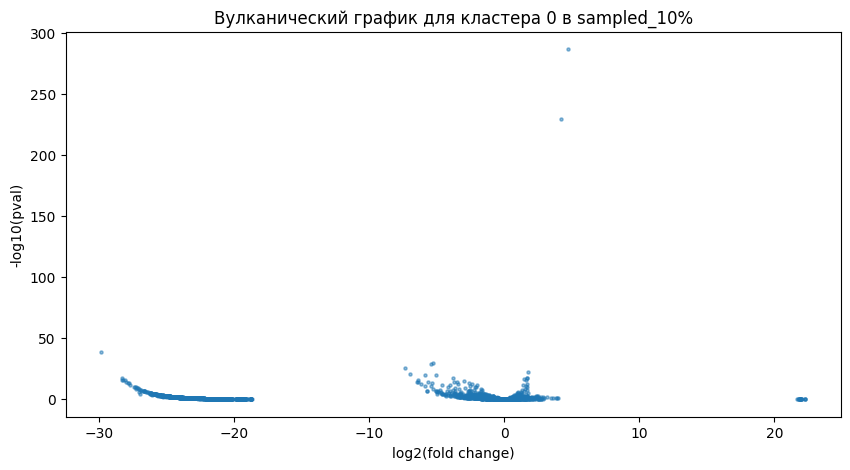

Топ 10 генов для кластера 0 (vs. остальные кластеры) в sampled_25%:
            names     scores  logfoldchanges          pvals      pvals_adj
0            Igkc  53.939781        3.827707   0.000000e+00   0.000000e+00
1            Ly6d  46.475208        3.511017   0.000000e+00   0.000000e+00
2            Ighd  29.189400        2.738953  4.055090e-166  2.703393e-163
3            Fcmr  25.566402        2.426375  2.215030e-131  8.860121e-129
4         Gm30211  22.695793        2.427964  2.250891e-105  5.001981e-103
5          Fcer2a  22.680817        2.771701  1.889779e-104  3.779558e-102
6            Cd55  20.766685        2.289809   1.518038e-89   2.168625e-87
7          Vpreb3  18.982126        2.619324   2.944732e-75   3.464390e-73
8           Chst3  15.787386        1.960082   5.929490e-54   3.388280e-52
9       Serpinb1a  14.939401        2.025985   1.320563e-48   6.288393e-47
10          Iglc1  14.321466        1.648124   4.411594e-45   1.877274e-43
11          Ifi30  14.147119    

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


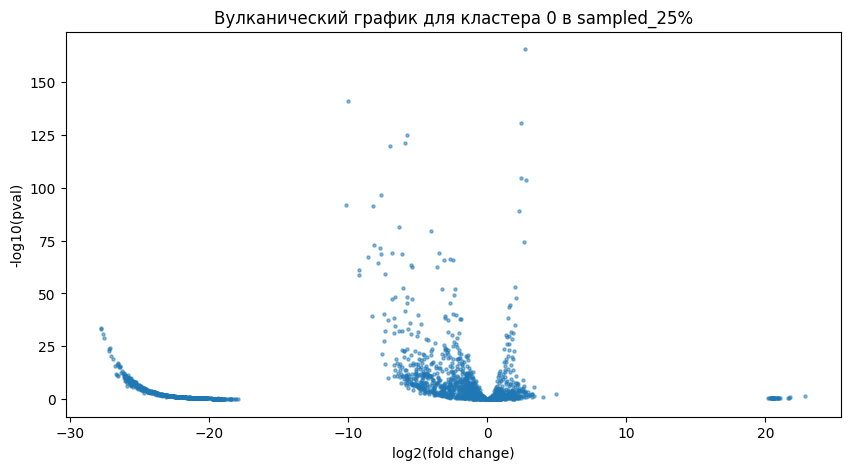

Топ 10 генов для кластера 0 (vs. остальные кластеры) в sampled_100%:
        names     scores  logfoldchanges          pvals      pvals_adj
0        Igkc  69.072342        3.767044   0.000000e+00   0.000000e+00
1        Ighd  63.546997        3.438504   0.000000e+00   0.000000e+00
2        Ly6d  54.041817        3.374712   0.000000e+00   0.000000e+00
3      Fcer2a  50.922138        3.729239   0.000000e+00   0.000000e+00
4        Fcmr  50.540520        3.001965   0.000000e+00   0.000000e+00
5        Cd55  41.738644        2.654050   0.000000e+00   0.000000e+00
6     Gm30211  40.484592        2.809269  2.134398e-303  5.335996e-301
7      Vpreb3  37.628647        3.235064  1.824247e-260  3.040411e-258
8   Serpinb1a  36.949306        2.805131  1.759785e-254  2.707361e-252
9       Chst3  31.149921        2.216028  8.781868e-192  5.165804e-190
10     B3gnt5  28.551132        2.337110  2.505998e-162  1.193333e-160
11       Lmo2  26.920645        2.218402  9.073717e-146  3.558320e-144
12    Gm

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


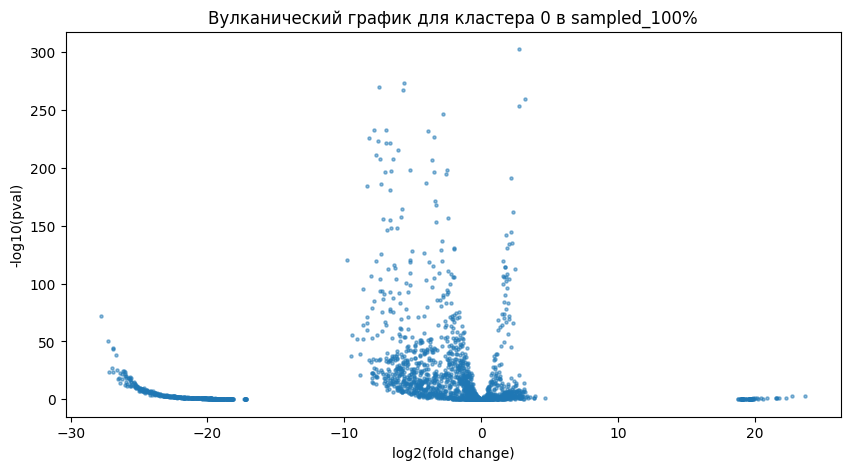

In [ ]:
processed_adatas = {}
for batch_name in batch_names:
  # Фильтруем данные по батчу
  adata_batch = adata_combined[adata_combined.obs['batch'] == batch_name].copy()
  processed_adatas[batch_name] = process_and_diff_exp(adata_batch, batch_name)



Внутри каждого батча происходит сравнение между клетками кластера 0 и всеми остальными клетками.


Для каждого батча был выведен список топ-20 дифференциально экспрессированных генов для кластера 0 (по сравнению с другими кластерами).

sampled_10%: * На вулканическом графике для sampled_10% видно, что есть много генов, которые значительно понижают свою экспрессию в кластере 0, по сравнению с остальными кластерами. А также есть несколько генов, которые повышают свою экспрессию. * Список топ-генов показывает, что гены (Igkc, Ly6d, Ighd …) сильно отличаются от остальных кластеров внутри этого батча.
sampled_25%:
На вулканическом графике для sampled_25% видно, что в кластере 0 в основном есть гены, которые понижают свою экспрессию.
Список топ-генов показывает, что гены (Marchf1, Ms4a4c, Prdx1…) сильно отличаются от остальных кластеров внутри этого батча.
sampled_100%: * На вулканическом графике для sampled_100% видно, что в кластере 0 есть как гены, которые повышают, так и понижают свою экспрессию.
Список топ-генов показывает, что гены (Igkc, Ly6d, Ighd …) сильно отличаются от остальных кластеров внутри этого батча.

Смотрим на дифференциально экспрессирующиеся гены в кластерах 0 и 1 между батчами 10%, 25% и оригиналом (100%)


Дифференциальная экспрессия генов для кластера 0:


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


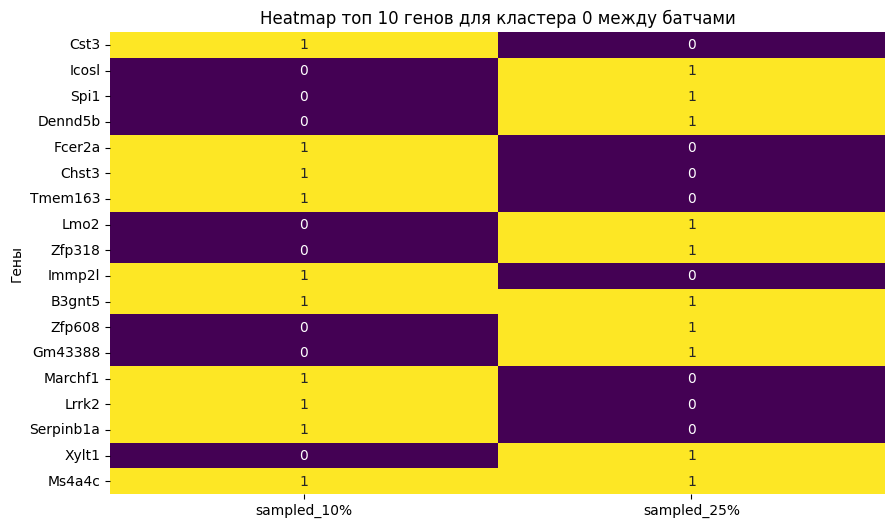


Дифференциальная экспрессия генов для кластера 1:


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


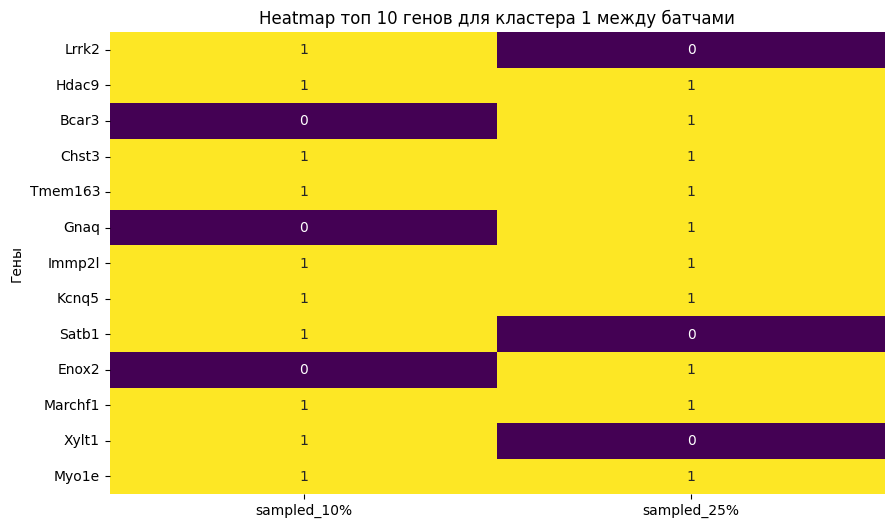

In [ ]:
def cluster_and_visualize(adata):
    # Заданные кластеры для анализа
    selected_clusters = ['0', '1']  # Кластеры 0 и 1 (или любые другие)

    # Дифференциальная экспрессия генов между батчами для каждого кластера
    for cluster in selected_clusters:
      print(f"\nДифференциальная экспрессия генов для кластера {cluster}:")
      adata_cluster = adata[adata.obs['leiden'] == cluster].copy()  # Выделяем кластер
      batches = adata_cluster.obs['batch'].unique() # Получаем батчи

      top_genes_per_batch = {}
      for batch in batches:
            if batch != "sampled_100%":
              sc.tl.rank_genes_groups(adata_cluster, 'batch', method='wilcoxon', key_added=f'diff_genes_cluster_{cluster}', groups=['sampled_100%'], reference=batch)
              res_df = sc.get.rank_genes_groups_df(adata_cluster, group="sampled_100%", key=f'diff_genes_cluster_{cluster}')
              top_genes_per_batch[batch] = res_df['names'].head(10).tolist()

      # Создаем DataFrame для heatmap
      all_genes = []
      for batch_genes in top_genes_per_batch.values():
         all_genes.extend(batch_genes)
      all_genes = list(set(all_genes))

      heatmap_data = pd.DataFrame(index = all_genes, columns = list(top_genes_per_batch.keys()))

      for batch, top_genes in top_genes_per_batch.items():
            for gene in all_genes:
              if gene in top_genes:
                heatmap_data.loc[gene, batch] = 1
              else:
                heatmap_data.loc[gene, batch] = 0

      # Строим Heatmap
      plt.figure(figsize=(10,6))
      sns.heatmap(heatmap_data.astype(int), cmap="viridis", annot=True, cbar=False) # Строим heatmap, 1 если ген есть в топ 10, 0 если нет, конвертируем в int.
      plt.title(f"Heatmap топ 10 генов для кластера {cluster} между батчами")
      plt.ylabel("Гены")
      plt.show()

cluster_and_visualize(adata_combined)
plt.show()



 Тепловая карта показывает, какие гены входят в топ 10 дифференциально экспрессируемых генов в батче по сравнению с батчем sampled_100%, 1 — есть, 0 — нет.
 Сравниваются батчи sampled_10% и sampled_25% с одним и тем же референсом — батчем sampled_100%. Это позволяет сделать прямое сравнение между этими батчами, относительно батча, у которого больше UMI.

 Ген Cst3, и Tmem163 являются общими для обоих батчей (sampled_10% и sampled_25%).

Батч-специфичные гены: Большинство генов (Lrrk2, Bcar3, Chst3, Tmem163, Gnaq, Immp2l, Kcnq5, Satb1, Enox2, Marchf1, Xylt1, Myo1e ) встречаются только в батче sampled_10%.

Общие гены: Некоторые гены (Lrrk2, Hdac9, Bcar3, Kcnq5, Myo1e) показывают дифференциальную экспрессию в обоих батчах, что может говорить о том, что эти гены могут быть важны для кластера 1.


Дифференциальная экспрессия внутри одного кластера между батчами

Дифференциальная экспрессия генов в кластере 0 между батчами...


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


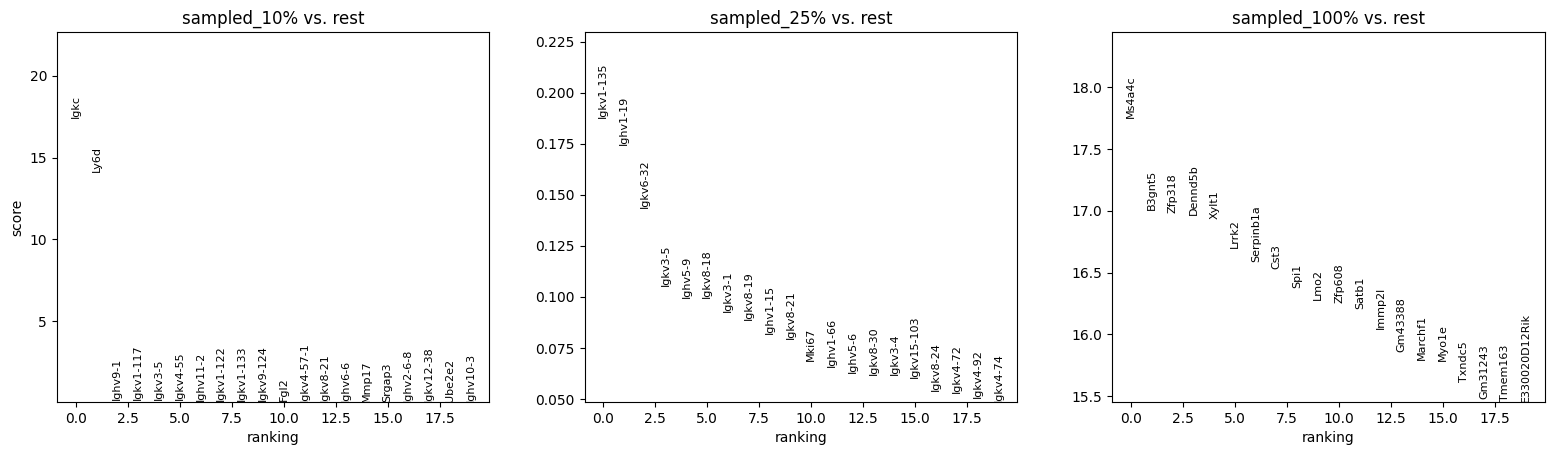

In [ ]:
# Выберем один кластер для анализа
selected_cluster = '0'

# Выделение клеток выбранного кластера
cluster_adata = adata_combined[adata_combined.obs['leiden'] == selected_cluster]

print(f"Дифференциальная экспрессия генов в кластере {selected_cluster} между батчами...")

# Выполнение дифференциальной экспрессии
sc.tl.rank_genes_groups(cluster_adata, groupby='batch', method='wilcoxon')
sc.pl.rank_genes_groups(cluster_adata, n_genes=20, sharey=False, key = 'rank_genes_groups')
plt.show()

Влияние батча на DE:Графики показывают, что набор генов, которые показывают дифференциальную экспрессию, зависит от количества UMI в батче. Это показывает, что батч-эффект, связанный с разным количеством UMI, влияет на то, как гены экспрессируются.

Разная степень дифференциальной экспрессии: Уровень дифференциальной экспрессии отличается между батчами. Чем меньше процент UMI, тем ниже score генов.

Различия в наборах генов: Разные батчи имеют разные наборы генов, которые показывают дифференциальную экспрессию. Это свидетельствует о том, что батчи могут влиять на экспрессию определенных генов более сильнее, чем других.

Батч-специфичные гены: Гены, которые сильно отличаются в одном батче, могут быть менее значимыми в других. Это говорит о том, что есть батч-специфичные гены.